In [1]:
# Assuming your target variable (labels) is in a column called 'Label'
import pandas as pd

# Load your dataset (replace with your actual file or DataFrame)
data = pd.read_csv('HateSpeechDatasetBalanced.csv')

# Check the distribution of the target variable
class_distribution = data['Label'].value_counts()

# Display the distribution
print(class_distribution)

# Optionally, display the distribution as percentages
class_percentage = data['Label'].value_counts(normalize=True) * 100
print(class_percentage)


Label
1    364525
0    361594
Name: count, dtype: int64
Label
1    50.201826
0    49.798174
Name: proportion, dtype: float64


In [2]:
data.isna().sum()

,0
Content,0
Label,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726119 entries, 0 to 726118
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  726119 non-null  object
 1   Label    726119 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ MB


In [4]:
data.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


<Axes: xlabel='Label', ylabel='count'>

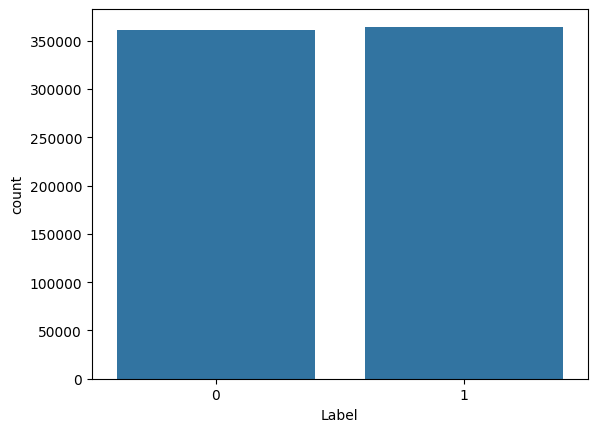

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='Label', data=data)

In [12]:
import re

In [13]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [14]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [15]:
X = []
sentences = list(data['Content'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [16]:
X[3]

'thought of real badass mongol style declaration of war the attackers capture citizen of the soon to be'

In [36]:
y = data['Label']
y


,Label
0,1
1,1
2,1
3,1
4,1
...,...
726114,1
726115,1
726116,1
726117,1


In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import pandas as pd

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [45]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [32]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [33]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [34]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from numpy import array, asarray, zeros

# Load GloVe embeddings
def load_glove_embeddings(file_path, vocab_size, embedding_dim=50):
    embeddings_dictionary = {}
    with open(file_path, encoding="utf8") as glove_file:
        for line in glove_file:
            records = line.split()
            word = records[0]
            vector_dimensions = asarray(records[1:], dtype='float32')
            embeddings_dictionary[word] = vector_dimensions

    embedding_matrix = zeros((vocab_size, embedding_dim))
    for word, index in tokenizer.word_index.items():
        if index < vocab_size:
            embedding_vector = embeddings_dictionary.get(word)
            if embedding_vector is not None:
                embedding_matrix[index] = embedding_vector

    return embedding_matrix

# Load embeddings and create the embedding matrix
embedding_matrix = load_glove_embeddings('glove.6B.50d.txt', vocab_size)

# Define the model
model = Sequential()
embedding_layer = Embedding(input_dim=vocab_size, output_dim=50, weights=[embedding_matrix], input_length=maxlen, trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       6,365,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,365,400 (24.28 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,365,400 (24.28 MB)

None


In [46]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 1143s 314ms/step - accuracy: 0.6751 - loss: 0.5902 - val_accuracy: 0.7766 - val_loss: 0.4607
Epoch 2/6
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 1115s 301ms/step - accuracy: 0.7915 - loss: 0.4408 - val_accuracy: 0.8098 - val_loss: 0.4138
Epoch 3/6
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 1178s 322ms/step - accuracy: 0.8073 - loss: 0.4112 - val_accuracy: 0.8178 - val_loss: 0.3943
Epoch 4/6
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 1138s 299ms/step - accuracy: 0.8223 - loss: 0.3846 - val_accuracy: 0.8236 - val_loss: 0.3809
Epoch 5/6
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 1097s 298ms/step - accuracy: 0.8290 - loss: 0.3705 - val_accuracy: 0.8267 - val_loss: 0.3781
Epoch 6/6
3631/3631 ━━━━━━━━━━━━━━━━━━━━ 1079s 297ms/step - accuracy: 0.8337 - loss: 0.3598 - val_accuracy: 0.8288 - val_loss: 0.3715


In [47]:
score = model.evaluate(X_train, y_train, verbose=1)
score

18153/18153 ━━━━━━━━━━━━━━━━━━━━ 937s 52ms/step - accuracy: 0.8373 - loss: 0.3526


[0.355593740940094, 0.835996150970459]

In [48]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.355593740940094
Train Accuracy: 0.835996150970459


In [49]:
score = model.evaluate(X_test, y_test, verbose=1)

4539/4539 ━━━━━━━━━━━━━━━━━━━━ 236s 52ms/step - accuracy: 0.8291 - loss: 0.3682


In [50]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.37043309211730957
Test Accuracy: 0.8286095857620239


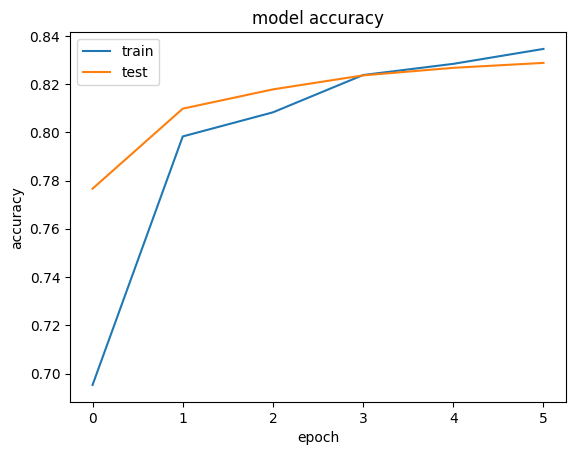

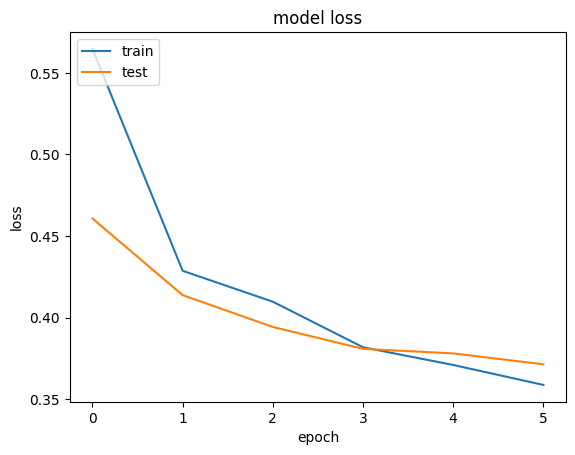

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy']) # Changed key to 'accuracy'
plt.plot(history.history['val_accuracy']) # Changed key to 'val_accuracy'

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()